In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy # tweepy module to interact with Twitter
import pandas as pd # Pandas library to create dataframes
from tweepy import OAuthHandler # Used for authentication
from tweepy import Cursor # Used to perform pagination

In [ ]:
"""
Twitter Authentification Credentials
Please update with your own credentials
"""
cons_key = 'OIjET3zU6sfl9a7fs8bRS1w1T'
cons_secret = 'nPRGlGV1SDrpLuso4w5tGZ8OG1XElYUd8HhZQJrVgZ1Ccs9SdD'
acc_token = '1567108423015342088-T2EJoRd1fPsl1BrxFwJpgmcUxd1UGk'
acc_secret = 'pdDizp2X8ytHJNCKCZH57DOqU5xpFjIOtssbEC72ONnK9'
# (1). Athentication Function
def get_twitter_auth():
    """
    @return:
        - the authentification to Twitter
    """
    try:
        consumer_key = cons_key
        consumer_secret = cons_secret
        access_token = acc_token
        access_secret = acc_secret
        
    except KeyError:
        sys.stderr.write("Twitter Environment Variable not Set\n")
        sys.exit(1)
        
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    return auth
# (2). Client function to access the authentication API
def get_twitter_client():
    """
    @return:
        - the client to access the authentification API
    """
    auth = get_twitter_auth()
    client = tweepy.API(auth, wait_on_rate_limit=True)
    return client
# (3). Function creating final dataframe
def get_tweets_from_user(twitter_user_name, page_limit=16, count_tweet=200):
    """
    @params:
        - twitter_user_name: the twitter username of a user (company, etc.)
        - page_limit: the total number of pages (max=16)
        - count_tweet: maximum number to be retrieved from a page
        
    @return
        - all the tweets from the user twitter_user_name
    """
    client = get_twitter_client()
    
    all_tweets = []
    
    for page in Cursor(client.user_timeline, 
                        screen_name=twitter_user_name, 
                        count=count_tweet).pages(page_limit):
        for tweet in page:
            parsed_tweet = {}
            parsed_tweet['date'] = tweet.created_at
            parsed_tweet['author'] = tweet.user.name
            parsed_tweet['twitter_name'] = tweet.user.screen_name
            parsed_tweet['text'] = tweet.text
            parsed_tweet['number_of_likes'] = tweet.favorite_count
            parsed_tweet['number_of_retweets'] = tweet.retweet_count
                
            all_tweets.append(parsed_tweet)
    
    # Create dataframe 
    df = pd.DataFrame(all_tweets)
    
    # Revome duplicates if there are any
    df = df.drop_duplicates( "text" , keep='first')
    
    return df

In [ ]:
"""
Twitter Authentification Credentials
Please update with your own credentials
"""
cons_key = 'OIjET3zU6sfl9a7fs8bRS1w1T'
cons_secret = 'nPRGlGV1SDrpLuso4w5tGZ8OG1XElYUd8HhZQJrVgZ1Ccs9SdD'
acc_token = '1567108423015342088-T2EJoRd1fPsl1BrxFwJpgmcUxd1UGk'
acc_secret = 'pdDizp2X8ytHJNCKCZH57DOqU5xpFjIOtssbEC72ONnK9'

auth = tweepy.OAuthHandler(cons_key, cons_secret)
api = tweepy.API(auth)
# (1). Athentication Function
def get_twitter_auth():
    """
    @return:
        - the authentification to Twitter
    """
    try:
        consumer_key = cons_key
        consumer_secret = cons_secret
        access_token = acc_token
        access_secret = acc_secret
        
    except KeyError:
        sys.stderr.write("Twitter Environment Variable not Set\n")
        sys.exit(1)
        
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    return auth
# (2). Client function to access the authentication API
def get_twitter_client():
    """
    @return:
        - the client to access the authentification API
    """
    auth = get_twitter_auth()
    client = tweepy.API(auth, wait_on_rate_limit=True)
    return client
# (3). Function creating final dataframe
def get_tweets_from_user(keywords, twitter_user_name, page_limit=16, count_tweet=5000):
    """
    @params:
        - twitter_user_name: the twitter username of a user (company, etc.)
        - page_limit: the total number of pages (max=16)
        - count_tweet: maximum number to be retrieved from a page
        
    @return
        - all the tweets from the user twitter_user_name
    """
    client = get_twitter_client()
    
    all_tweets = []
    
    

    tweets = tweepy.Cursor(api.search, q=keywords, lang="en",
    tweet_mode='extended').items(count_tweet)

    list_tweets = [tweet for tweet in tweets]
    
    # for page in Cursor(client.user_timeline, 
    #                     q=keywords, 
    #                     count=count_tweet).pages(page_limit):
    for tweet in list_tweets:
        parsed_tweet = {}
        parsed_tweet['date'] = tweet.created_at
        parsed_tweet['author'] = tweet.user.name
        parsed_tweet['twitter_name'] = tweet.user.screen_name
        try:
            parsed_tweet['text'] = tweet.retweeted_status.full_text
        except AttributeError:
            parsed_tweet['text'] = text = tweet.full_text
        # parsed_tweet['text'] = tweet.text
        # parsed_tweet['number_of_likes'] = tweet.favorite_count
        parsed_tweet['number_of_retweets'] = tweet.retweet_count
            
        all_tweets.append(parsed_tweet)
    
    # Create dataframe 
    df = pd.DataFrame(all_tweets)
    
    # Revome duplicates if there are any
    # df = df.drop_duplicates( "text" , keep='first')
    
    return df

In [ ]:
googleAI = get_tweets_from_user("thexanwillshine")
print("Data Shape: {}".format(googleAI.shape))

Data Shape: (3156, 6)


In [ ]:
googleAI.head(10)

,date,author,twitter_name,text,number_of_likes,number_of_retweets
0,2022-09-30 05:07:29,shine 🌟 | #NEVERAGAIN,thexanwillshine,Really have no idea where my mom and her sibli...,0,0
1,2022-09-30 04:58:14,shine 🌟 | #NEVERAGAIN,thexanwillshine,My gf: *makes me order for stuff when we're in...,0,0
2,2022-09-30 02:17:43,shine 🌟 | #NEVERAGAIN,thexanwillshine,RT @lovejudecardan: they lost focus and had a ...,0,53
3,2022-09-29 12:29:36,shine 🌟 | #NEVERAGAIN,thexanwillshine,Himbo cardan behavior https://t.co/jO5cqjzdoB,0,0
4,2022-09-29 10:48:27,shine 🌟 | #NEVERAGAIN,thexanwillshine,RT @adrietine: I saw a jp comment that said th...,0,8510
5,2022-09-29 10:44:54,shine 🌟 | #NEVERAGAIN,thexanwillshine,RT @BudrykZack: Every Prince Harry interview i...,0,13926
6,2022-09-29 10:11:19,shine 🌟 | #NEVERAGAIN,thexanwillshine,RT @mayahorizons: no board game will ever comp...,0,44539
7,2022-09-29 10:09:57,shine 🌟 | #NEVERAGAIN,thexanwillshine,RT @RhodeToLove: i lost focus and had a consen...,0,11926
8,2022-09-29 09:53:10,shine 🌟 | #NEVERAGAIN,thexanwillshine,Hell week initiation rites such as the one tha...,0,0
9,2022-09-29 02:59:56,shine 🌟 | #NEVERAGAIN,thexanwillshine,"RT @ElyKreimendahl: me, *flirting*: would you ...",0,17780


In [ ]:
tweets_df = googleAI

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install pyLDAvis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install tweepy
    !pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-09-30 05:48:20.006591: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 7.8 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [ ]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
def to_lowercase(text):
    return text.lower()
#converting every row of the column into lower case
tweets_df.text=tweets_df.text.apply(to_lowercase)

def standardize_accented_chars(text):
 return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#testing the function on a single sample for explaination
print(standardize_accented_chars('Sómě words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.'))
#standardizing accented characters for every row
tweets_df.text=tweets_df.text.apply(standardize_accented_chars)

def get_number_of_urls(documents):
    print("{:.2f}% of documents contain urls".format(sum
(documents.apply(lambda x:x.find('http'))>0)/len
(documents)*100))
# Passing the 'Tweets' column of the dataframe as the argument
print(get_number_of_urls(tweets_df.text)) 

def remove_url(text):
 return re.sub(r'https?:\S*', '', text)
#testing the function on a single sample for explaination
print(remove_url('using https://www.google.com/ as an example'))
#removing urls from every row
tweets_df.text=tweets_df.text.apply(remove_url)

def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
       expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)
#testing the function on a single sample for explaination
print(expand_contractions("Don't is same as do not"))
#expanding contractions for every row
tweets_df.text=tweets_df.text.apply(expand_contractions)

def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)
#testing the function on a single sample for explaination
print(remove_mentions_and_tags('Some random @abc and #def'))
#removing mentions and tags from every row
tweets_df.text=tweets_df.text.apply(remove_mentions_and_tags)

def keep_only_alphabet(text):
    return re.sub(r'[^a-z]', ' ', text)
#testing the function on a single sample for explaination
print(keep_only_alphabet('Just a bit more $$processing required.Just a bit!!!'))
#for all the rows
tweets_df.text=tweets_df.text.apply(keep_only_alphabet)

AttributeError: ignored

In [ ]:
def remove_stopwords(text,nlp,custom_stop_words=None,
remove_small_tokens=True,min_len=2):
    # if custom stop words are provided, then add them to default stop words list
    if custom_stop_words:
        nlp.Defaults.stop_words |= custom_stop_words
    
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        
        if token.is_stop == False: 
            
            # if small tokens have to be removed, then select only those which are longer than the min_len 
            if remove_small_tokens:
                if len(token.text)>min_len:
                    filtered_sentence.append(token.text)
            else:
                filtered_sentence.append(token.text)
    # if after the stop word removal, words are still left in the sentence, then return the sentence as a string else return null 
    return " ".join(filtered_sentence) if len(filtered_sentence)>0 else None
#creating a spaCy object. 
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
#removing stop-words and short words from every row
tweets_df.text=tweets_df.text.apply(lambda x:remove_stopwords(x,nlp,{"elon","musk",}))

In [ ]:
def lemmatize(text, nlp):
  text = str(text)
  doc = nlp(text)
  lemmatized_text = []
  for token in doc:
    lemmatized_text.append(token.lemma_)
  return " ".join(lemmatized_text)
#testing the function on a single sample for explaination
print(lemmatize('Reading NLP blog is fun.' ,nlp))
#Performing lemmatization on every row

def printthing(x):
  print(x)
  
tweets_df.text=tweets_df.text.apply(lambda x: lemmatize(x, nlp))
# try:
#     tweets_df.text=tweets_df.text.apply(lambda x:lemmatize(x,nlp))
# except Exception as e:
#   print(e)

read NLP blog be fun .


In [ ]:
def generate_tokens(tweet):
  tweet = str(tweet)
  words=[]
  for word in tweet.split(' '):
  # using the if condition because we introduced extra spaces during text cleaning
    if word!='':
      words.append(word)
  return words
#storing the generated tokens in a new column named 'words'
# print(tweets_df.text)
tweets_df['tokens']=tweets_df.text.apply(generate_tokens)

In [ ]:
def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(tweets_df.tokens)
print(id2word)

Dictionary(569 unique tokens: ['bald', 'battle', 'cute', 'exciting', 'get']...)


In [ ]:
def create_document_matrix(tokens,id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tweets_df.tokens,id2word)
print(tweets_df.tokens[0])
print(corpus[0])

['old', 'bald', 'guy', 'cute', 'hahahahaha', 'battle', 'katipunan', 'get', 'exciting']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=10,
 random_state=100,
 )

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(lda_model,10,10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,katipunan,katipunan,katipunan,katipunan,katipunan,katipunan,katipunan,katipunan,katipunan,katipunan
1,happen,math,leader,fashion,queen,night,mmda,traffic,hall,mmda
2,register,class,flyover,vlogger,king,guy,aurora,pop,ave,truck
3,female,amp,report,look,leonpostigo,venti,truck,proud,year,advocacy
4,road,hashtag,southbound,kind,advise,tutor,flyover,vehicle,happen,love
5,invite,let,quezon,vlog,hour,online,enforcer,area,amp,garcia
6,budget,mmda,lane,send,naga,grade,vehicle,lose,white,avenue
7,busy,drive,city,kim,affect,student,lane,flyover,set,traffic
8,virtual,go,smash,timely,precautionary,americans,occupy,non,pob,continue
9,universe,love,escopa,winrina,impact,invite,involve,world,join,brake


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.222625 -0.061381       1        1  31.719484
8      0.164418 -0.109131       2        1  15.002962
9     -0.132518  0.084202       3        1  11.051112
7      0.002065 -0.172342       4        1   9.186055
0      0.153784  0.024219       5        1   7.875424
1      0.085576  0.145463       6        1   7.705204
5     -0.012533  0.146824       7        1   6.643910
2     -0.043283 -0.075108       8        1   4.999835
3     -0.028893  0.001043       9        1   3.184964
4      0.034009  0.016212      10        1   2.631050, topic_info=          Term       Freq      Total Category  logprob  loglift
376       hall   5.000000   5.000000  Default  30.0000  30.0000
7    katipunan  41.000000  41.000000  Default  29.0000  29.0000
291       mmda  11.000000  11.000000  Default  28.0000  28.0000
180    flyover   7.000000   7.000000  Default  27.0000  27.0000
232      truck   9.000000   9.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
484        set   0.117961   1.850583  Topic10  -5.3487   0.8849
7    katipunan   0.582726  41.672356  Topic10  -3.7513  -0.6321
542  available   0.108638   1.729377  Topic10  -5.4310   0.8703
270        bgc   0.105100   1.720121  Topic10  -5.4641   0.8426
540       week   0.102336   1.649387  Topic10  -5.4908   0.8579

[440 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
217       1  0.650164      accident
217       3  0.162541      accident
217       6  0.162541      accident
313       7  0.954425  accidentally
175       8  0.984513        accord
...     ...       ...           ...
541       3  0.832386         worth
282       4  0.897936           yan
39        1  0.346334          year
39        2  0.346334          year
326       7  0.954425        yeshua

[387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 10, 8, 1, 2, 6, 3, 4, 5])

In [ ]:
tweets_df = googleAI
tweets_df.rename(columns={'text': 'content'}, inplace=True)
tweets_df=tweets_df.loc[:,['content']]
tweets_df

,content
0,How do you go to uptc from katip lrt station
1,passing by katip and I’m back to blaming AdMU ...
2,in mental masturbation about 5 gorillion yrs o...
3,"@sunixim i can’t unsee anymore. like, ni-ki lo..."
4,in mental masturbation about 5 gorillion yrs o...
...,...
98,bakit ang out of the way nung nag iisang minis...
99,"@katip_baja Will be great with us, I’m really ..."
100,“Hasankeyf was founded by Kurdish rulers. \n\n...
101,hiii wts lfb ph\n\nAvril Lavigne “Head Above W...


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = re.sub(r'rt', '', text)
  text = re.sub(r'@[A-Za-z0-9_]', '', text)
  return text

tweets_df_clean = pd.DataFrame(tweets_df.content.apply(lambda x: clean_text(x)))
print(tweets_df_clean)


                                               content
0           how do you go to uptc from katip l station
1    passing by katip and i’m back to blaming admu ...
2    in mental masturbation about  gorillion yrs of...
3    sunixim i can’t unsee anymore like niki looks ...
4    in mental masturbation about  gorillion yrs of...
..                                                 ...
98   bakit ang out of the way nung nag iisang minis...
99   katipbaja will be great with us i’m really sur...
100  “hasankeyf was founded by kurdish rulers \n\nt...
101  hiii wts lfb ph\n\navril lavigne “head above w...
102  walking katip post pandemic is so surreal the ...

[103 rows x 1 columns]


In [ ]:
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):
  sent = []
  doc = nlp(text)
  for word in doc:
    sent.append(word.lemma_)
  return " ".join(sent)

tweets_df_clean = pd.DataFrame(tweets_df_clean.content.apply(lambda x: lemmatizer(x)))
tweets_df_clean['content'] = tweets_df_clean['content'].str.replace('-PRON-', '')
# tweets_df_clean = tweets_df_clean.drop_duplicates( "content" , keep='first')

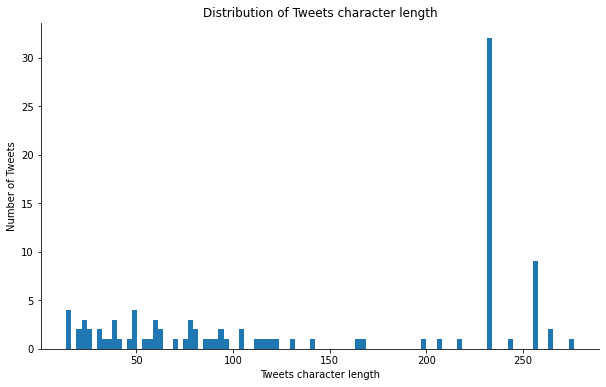

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.content]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

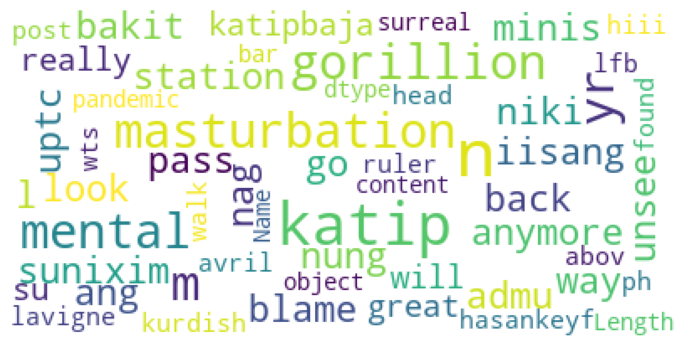

In [ ]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(tweets_df_clean.content))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_words(tweets_df_clean.content, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram

,unigram,count
0,katip,86
1,rich,64
2,people,35
3,really,35
4,free,35
5,premium,32
6,gateway,32
7,drug,32
8,mass,32
9,transpo,32


In [ ]:
def get_top_n_trigram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_trigram(tweets_df_clean.content, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram

,trigram,count
0,premium really gateway,32
1,really gateway drug,32
2,gateway drug mass,32
3,drug mass transpo,32
4,mass transpo rich,32
5,transpo rich people,32
6,rich people sad,32
7,people sad shut,32
8,sad shut route,32
9,shut route naia,32


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(
  analyzer='word',       
  min_df=3,# minimum required occurences of a word 
  stop_words='english',# remove stop words
  lowercase=True,# convert all words to lowercase
  token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
  max_features=5000,# max number of unique words
  )

data_matrix = vectorizer.fit_transform(tweets_df_clean.content)
data_matrix

<103x60 sparse matrix of type '<class 'numpy.int64'>'
	with 989 stored elements in Compressed Sparse Row format>

In [ ]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      32.420952   8.115230       1        1  65.490134
1       0.648955  71.707100       2        1  20.179548
5      71.019684   9.971006       3        1   6.666385
9       3.785981  33.185135       4        1   1.807224
7     -42.666500  -9.222070       5        1   1.419739
4      -3.621689 -43.526516       6        1   1.257282
2      -3.632402  -4.171708       7        1   0.957040
0     -36.584400  35.804413       8        1   0.740890
8      44.391380  50.615383       9        1   0.740884
6      40.235809 -31.591665      10        1   0.740874, topic_info=      Term       Freq      Total Category  logprob  loglift
21   katip  69.000000  69.000000  Default  30.0000  30.0000
45    rich  62.000000  62.000000  Default  29.0000  29.0000
43  really  33.000000  33.000000  Default  28.0000  28.0000
8     free  33.000000  33.000000  Default  27.0000  27.0000
47     sad  32.000000  32.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
45    rich   0.133646  62.321697  Topic10  -4.0554  -1.2398
8     free   0.129015  33.711266  Topic10  -4.0907  -0.6606
47     sad   0.128529  32.117540  Topic10  -4.0944  -0.6159
12    grab   0.127972  32.018025  Topic10  -4.0988  -0.6171
21   katip   0.128789  69.355963  Topic10  -4.0924  -1.3837

[457 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.483134  announce
0         4  0.241567  announce
1         1  0.933811       bgc
2         3  0.553737      come
2         4  0.276869      come
...     ...       ...       ...
57        3  0.475101     wanna
57        5  0.237550     wanna
58        3  0.425559      want
58        4  0.212779      want
59        2  0.805860     world

[87 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 6, 10, 8, 5, 3, 1, 9, 7])

In [ ]:
for i,topic in enumerate(lda_model.components_):
  print(f'Top 10 words for topic #{i}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #0:
['really', 'drug', 'gateway', 'transpo', 'grab', 'mobility', 'sad', 'mass', 'kid', 'rich']


Top 10 words for topic #1:
['history', 'dungan', 'literacy', 'mental', 'rate', 'gorillion', 'early', 'katip', 'empire', 'jihad']


Top 10 words for topic #2:
['naia', 'route', 'bgc', 'transpo', 'sad', 'set', 'rich', 'issue', 'microsofthelp', 'really']


Top 10 words for topic #3:
['sad', 'naia', 'parent', 'people', 'shut', 'kid', 'free', 'katip', 'really', 'rich']


Top 10 words for topic #4:
['literacy', 'parent', 'home', 'katip', 'pls', 'microsofthelp', 'free', 'issue', 'day', 'friend']


Top 10 words for topic #5:
['home', 'tour', 'want', 'know', 'traffic', 'wanna', 'miss', 'just', 'time', 'katip']


Top 10 words for topic #6:
['know', 'masturbation', 'high', 'empire', 'mental', 'jihad', 'population', 'gorillion', 'rebellion', 'early']


Top 10 words for topic #7:
['katipbaja', 'want', 'time', 'katip', 'people', 'free', 'microsofthelp', 'friend', 'wanna', 'like']



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
topic_values = lda_model.transform(data_matrix)
# print(topic_values)
# print(data_matrix)
# print(tweets_df['content'][70])
# print(len(tweets_df))
# print(len(topic_values.argmax(axis=1)))
# print(topic_values.argmax(axis=1))
# topic_values = pd.Series(topic_values.argmax(axis=1))
# print(len(topic_values.argmax(axis=1)))
tweets_df['Topic'] = topic_values.argmax(axis=1)

In [ ]:
tweets_df

,content,Topic
0,How do you go to uptc from katip lrt station,5
1,passing by katip and I’m back to blaming AdMU ...,5
2,in mental masturbation about 5 gorillion yrs o...,1
3,"@sunixim i can’t unsee anymore. like, ni-ki lo...",7
4,in mental masturbation about 5 gorillion yrs o...,1
...,...,...
98,bakit ang out of the way nung nag iisang minis...,5
99,"@katip_baja Will be great with us, I’m really ...",9
100,“Hasankeyf was founded by Kurdish rulers. \n\n...,5
101,hiii wts lfb ph\n\nAvril Lavigne “Head Above W...,5
